# “Фреймворк PyTorch для разработки искусственных нейронных сетей”

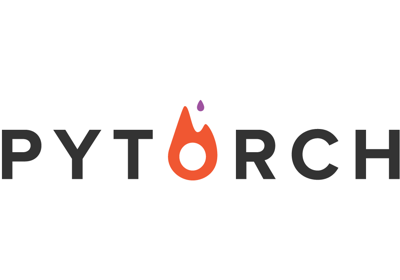

### https://pytorch.org/

In [1]:
!pip install torch==1.6.0+cpu torchvision==0.7.0+cpu -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html


In [1]:
!nvcc --version

"nvcc" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


### Подключение 

In [1]:
import torch
import torchvision

In [2]:
import numpy as np

#### Подключаемые модули

In [20]:
from torch import nn 
from torch import optim

In [96]:
linear = nn.Linear(2, 2)

In [97]:
print ('w: ', linear.weight)
print ('b: ', linear.bias)

w:  Parameter containing:
tensor([[ 0.3546,  0.0147],
        [-0.4994, -0.2208]], requires_grad=True)
b:  Parameter containing:
tensor([-0.2989,  0.2717], requires_grad=True)


In [98]:
criterion = nn.MSELoss()

In [99]:
optimizer = torch.optim.SGD(linear.parameters(), lr=0.01)

In [100]:
x = Variable(torch.randn(2), requires_grad = True)
y = Variable(torch.randn(2), requires_grad = False)

In [101]:
optimizer.zero_grad()
pred = linear(x)
loss = criterion(pred, y)
print('loss: ', loss.item())

loss:  1.069239854812622


In [102]:
print ('dL/dw: ', linear.weight.grad) 
print ('dL/db: ', linear.bias.grad)

dL/dw:  None
dL/db:  None


In [107]:
#оборачиваем в цикл
for epoch in range(10):  
    running_loss = 0.0
    inputs, labels = x, y

        # обнуляем градиент
    optimizer.zero_grad()
    outputs = linear(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

        # выводим статистику о процессе обучения
    running_loss = loss.item()
    print('[%d] loss: %.3f' %
            (epoch + 1, running_loss))

print('Training is finished!')

#loss.backward()

[1] loss: 0.021
[2] loss: 0.020
[3] loss: 0.019
[4] loss: 0.018
[5] loss: 0.017
[6] loss: 0.016
[7] loss: 0.015
[8] loss: 0.014
[9] loss: 0.014
[10] loss: 0.013
Training is finished!


In [108]:
print ('dL/dw: ', linear.weight.grad) 
print ('dL/db: ', linear.bias.grad)

dL/dw:  tensor([[-0.0666, -0.0371],
        [-0.1739, -0.0969]])
dL/db:  tensor([-0.0576, -0.1502])


In [109]:
print ('w: ', linear.weight)
print ('b: ', linear.bias)

w:  Parameter containing:
tensor([[0.5509, 0.1240],
        [0.0129, 0.0646]], requires_grad=True)
b:  Parameter containing:
tensor([-0.1293,  0.7143], requires_grad=True)


#### Загрузка существующего датасета:

In [33]:
import torchvision.transforms as transforms
import matplotlib.pyplot as plt ### воспользуемся для отображения изображения

In [35]:
train_dataset = torchvision.datasets.CIFAR10(root='data/',
                                             train=True,  
                                             transform=transforms.ToTensor(), 
                                             download=True)


image, label = train_dataset[0]
print (image.size())
print (label)

Extracting data/cifar-10-python.tar.gz to data/
torch.Size([3, 32, 32])
6


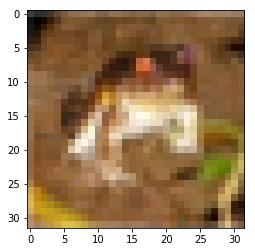

In [36]:
plt.imshow(image.permute(1, 2, 0).numpy())

In [37]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=64, 
                                           shuffle=True)

In [38]:
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transforms.ToTensor())
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=4,
                                         shuffle=False)

Files already downloaded and verified


In [39]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Определим следующую модель:

In [76]:
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
#        x = F.relu(self.fc21(x))
        
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
#-----------------        
        
        return x


net = Net().to('cpu')

In [87]:
#изменил ф-цию оптимизации
criterion = nn.CrossEntropyLoss()
#optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
optimizer = optim.Adam(net.parameters(), lr=0.001) #momentum=0.9)

In [88]:
for epoch in range(10):  
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0], data[1]

        # обнуляем градиент
        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # выводим статистику о процессе обучения
        running_loss += loss.item()
        if i % 300 == 0:    # печатаем каждые 300 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Training is finished!')

[1,     1] loss: 0.001
[1,   301] loss: 0.299
[1,   601] loss: 0.252
[2,     1] loss: 0.001
[2,   301] loss: 0.229
[2,   601] loss: 0.221
[3,     1] loss: 0.001
[3,   301] loss: 0.209
[3,   601] loss: 0.207
[4,     1] loss: 0.001
[4,   301] loss: 0.195
[4,   601] loss: 0.193
[5,     1] loss: 0.001
[5,   301] loss: 0.188
[5,   601] loss: 0.185
[6,     1] loss: 0.001
[6,   301] loss: 0.179
[6,   601] loss: 0.180
[7,     1] loss: 0.001
[7,   301] loss: 0.174
[7,   601] loss: 0.172
[8,     1] loss: 0.001
[8,   301] loss: 0.169
[8,   601] loss: 0.167
[9,     1] loss: 0.001
[9,   301] loss: 0.162
[9,   601] loss: 0.164
[10,     1] loss: 0.000
[10,   301] loss: 0.159
[10,   601] loss: 0.158
Training is finished!


#### Сохранение модели

In [89]:
PATH = './cifar_net_version_test_intro.pth'
torch.save(net.state_dict(), PATH)

In [90]:
print("Model state_dict: ")
for param in net.state_dict():
    print(param," \ ", net.state_dict()[param].size())

Model state_dict: 
conv1.weight  \  torch.Size([6, 3, 5, 5])
conv1.bias  \  torch.Size([6])
conv2.weight  \  torch.Size([16, 6, 5, 5])
conv2.bias  \  torch.Size([16])
fc1.weight  \  torch.Size([120, 400])
fc1.bias  \  torch.Size([120])
fc2.weight  \  torch.Size([84, 120])
fc2.bias  \  torch.Size([84])
fc3.weight  \  torch.Size([10, 84])
fc3.bias  \  torch.Size([10])


#### Загрузка и использование модели 

In [91]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [92]:
data_iter = iter(test_loader)
images, labels = data_iter.next()

GroundTruth:    cat  ship  ship plane


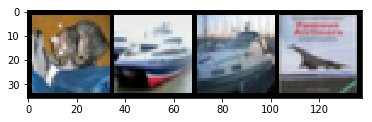

In [93]:
outputs = net(images)
imgs = torchvision.utils.make_grid(images)
plt.imshow(imgs.permute(1, 2, 0).numpy())
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [94]:
print(outputs)

tensor([[-2.5278, -1.6779, -1.1396,  1.9635, -0.6958,  1.0786,  0.3674, -1.4474,
         -0.5242, -2.6904],
        [ 2.7049,  4.9769, -3.4338, -4.7493, -6.2397, -7.4117, -4.7284, -6.5884,
          5.7621,  1.8875],
        [ 2.1252,  3.0293, -2.9176, -3.2003, -3.9248, -5.0240, -4.1702, -4.3297,
          3.9560,  1.3723],
        [ 2.4615,  0.3997, -1.7222, -2.9475, -1.2486, -5.0998, -2.6576, -3.3030,
          4.2374, -0.8134]], grad_fn=<AddmmBackward>)


In [95]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat  ship  ship  ship


Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [112]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28 * 28, 128)        
        self.fc2 = nn.Linear(128, 10)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = nn.functional.dropout(inputs, p=0.2, training=True)
        x = F.softmax(self.fc2(x))
#-----------------        
        return x


net = Net().to('cpu')